In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats

# Comparison of 6 continents

The problem: Are there significant differences in mortality rates between different countries/continents?

The solution: ANOVA - Determine whether there are any significant differences in continents vs. Mortality rates.

# Dataset:  average_air_quality_health_continents_included.csv

In [11]:
# Create a file path

anova_csv_path = Path("average_air_quality_health_continents_included.csv")

# Read in the data. 
anova_df = pd.read_csv(anova_csv_path)
anova_df.head()

,City,Country,PM2.5,PM10,NO2,O3,SO2,CO,NH3,MortalityRate_per_100k,CountryName,Continent
0,abbeville,FR,4.7,8.8,4.7,36.8,0.8,210.3,1.3,4.1,France,Europe
1,acarau,BR,2.1,9.6,0.2,52.2,0.1,353.8,0.1,9.6,Brazil,South America
2,agbor,NG,29.9,39.2,5.7,2.5,0.4,894.6,0.6,29.6,Nigeria,Africa
3,al jawf,SA,11.1,39.2,1.0,101.6,1.7,193.6,0.5,33.5,Saudi Arabia,Asia
4,al qusayr,SY,7.9,10.0,4.7,40.8,2.5,210.3,2.7,26.6,Syrian Arab Republic,Asia


<Axes: title={'center': 'MortalityRate_per_100k'}, xlabel='Continent'>

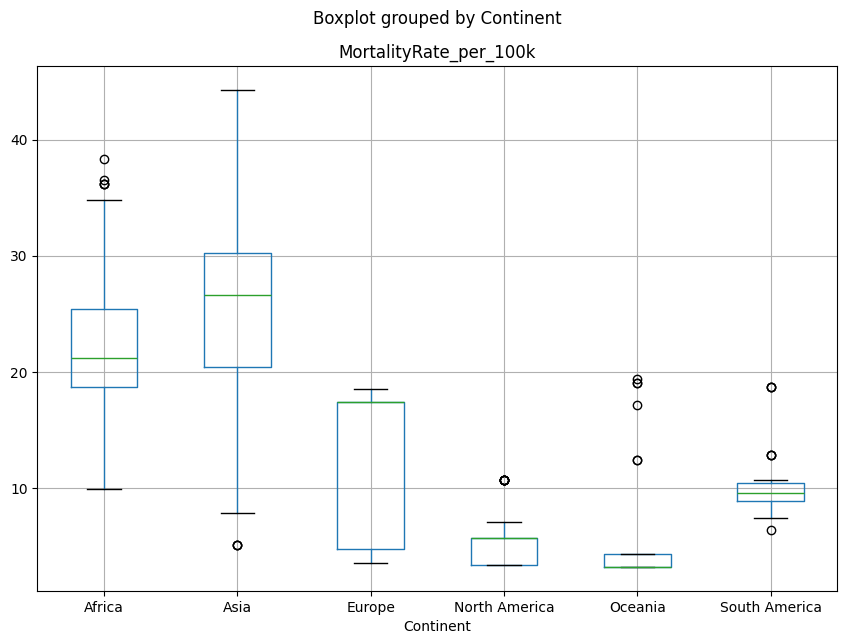

In [12]:
# Create a boxplot to compare means
anova_df.boxplot("MortalityRate_per_100k", by="Continent", figsize=(10, 7))

In [17]:
# Extract individual groups
group0 = anova_df[anova_df["Continent"] == "Africa"]["MortalityRate_per_100k"]
group1 = anova_df[anova_df["Continent"] == "Asia"]["MortalityRate_per_100k"]
group2 = anova_df[anova_df["Continent"] == "Europe"]["MortalityRate_per_100k"]
group3 = anova_df[anova_df["Continent"] == "North America"]["MortalityRate_per_100k"]
group4= anova_df[anova_df["Continent"] == "Oceania"]["MortalityRate_per_100k"]
group5 = anova_df[anova_df["Continent"] == "South America"]["MortalityRate_per_100k"]

In [18]:
# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4,group5)

F_onewayResult(statistic=np.float64(121.45747674065453), pvalue=np.float64(2.1944559322042223e-77))

- P-value: 2.19e-77 (approx.) --> Extremely small, much less than the common significance level of 0.05.

- Interpretation: The null hypothesis is rejected, this means that there is a significant evidence that the mortality rates differ accross the countries, depending on the continent that each country is located in.